# Init & parsing


In [1]:
from collections import Counter
from application import *
from pre_processing import Job, Systems, Objects 
import statistics
import numpy as np
import matplotlib.pyplot as plt
from journal import Journal, JournalASU, jobs_to_df
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [7]:
jobs = []
jobs.extend(process_files(r'.\input data\SAKE', all_visible_sheets, works_parser.ParserSake))
# jobs.extend(process_files(r'.\input data\1', all_visible_sheets, works_parser.ParserSake)) # tests
# jobs.extend(process_files(r'.\input data\АСУ', find_sheets_asu, works_parser.ParserAsu))
# jobs.extend(process_files(r'.\input data\ВОЛС', all_visible_sheets, works_parser.ParserVols))
# jobs.extend(process_files(r'.\input data\Телеканал', find_sheets_vols, works_parser.ParserTk))
# jobs.extend(process_files(r'.\input data\АИИСКУЭ', find_sheets_vols, works_parser.ParserAskueSake))
# jobs.extend(process_files(r'.\input data\АИИСКУЭ', find_sheets_vols, works_parser.ParserAskue))
# jobs.extend(process_files(r'.\input data\Тех.учет', find_sheets_vols, works_parser.ParserTechReg))
print(len(jobs))

folder: .\input data\SAKE
558


In [ ]:
make_xlsx_from_jobs(jobs)

In [8]:
stats = Counter((j.system, j.object)for j in jobs)    
# print(stats)

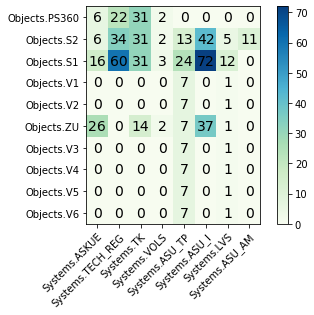

In [9]:
statistics.visualize_statistics(stats)

In [5]:
for (xlabel, ylabel), count in stats.items():
    print(f'{str(xlabel).ljust(17)}, {str(ylabel).ljust(15)} - {str(count).ljust(5)}')

Systems.ASU_TP   , Objects.V1      - 7    
Systems.ASU_TP   , Objects.V2      - 7    
Systems.ASU_TP   , Objects.S1      - 24   
Systems.ASU_TP   , Objects.ZU      - 7    
Systems.ASU_TP   , Objects.V3      - 7    
Systems.ASU_TP   , Objects.S2      - 13   
Systems.ASU_TP   , Objects.V4      - 7    
Systems.ASU_TP   , Objects.V5      - 7    
Systems.ASU_TP   , Objects.V6      - 7    
Systems.ASU_I    , Objects.S1      - 72   
Systems.ASU_I    , Objects.ZU      - 37   
Systems.ASU_I    , Objects.S2      - 42   
Systems.LVS      , Objects.V1      - 1    
Systems.LVS      , Objects.V2      - 1    
Systems.LVS      , Objects.S1      - 12   
Systems.LVS      , Objects.ZU      - 1    
Systems.LVS      , Objects.V3      - 1    
Systems.LVS      , Objects.S2      - 5    
Systems.LVS      , Objects.V4      - 1    
Systems.LVS      , Objects.V5      - 1    
Systems.LVS      , Objects.V6      - 1    
Systems.ASU_AM   , Objects.S2      - 11   


# Tests

ASU test


In [10]:
assert stats[(Systems.ASU_TP, Objects.S1)] > 0
assert stats[(Systems.ASU_TP, Objects.S2)] > 0
assert stats[(Systems.ASU_TP, Objects.V1)] > 0
assert stats[(Systems.ASU_TP, Objects.V2)] > 0
assert stats[(Systems.ASU_TP, Objects.V3)] > 0
assert stats[(Systems.ASU_TP, Objects.V4)] > 0
assert stats[(Systems.ASU_TP, Objects.V5)] > 0
assert stats[(Systems.ASU_TP, Objects.V6)] > 0
# assert stats[(Systems.ASU_TP, Objects.ZU)] > 0

assert stats[(Systems.ASU_I, Objects.S1)] > 0
assert stats[(Systems.ASU_I, Objects.S2)] > 0
# assert stats[(Systems.ASU_I, Objects.ZU)] > 0

assert stats[(Systems.ASU_AM, Objects.S2)] > 0

assert stats[(Systems.LVS, Objects.S1)] > 0
assert stats[(Systems.LVS, Objects.S2)] > 0
assert stats[(Systems.LVS, Objects.V1)] > 0
assert stats[(Systems.LVS, Objects.V2)] > 0
assert stats[(Systems.LVS, Objects.V3)] > 0
assert stats[(Systems.LVS, Objects.V4)] > 0
assert stats[(Systems.LVS, Objects.V5)] > 0
assert stats[(Systems.LVS, Objects.V6)] > 0
# assert stats[(Systems.LVS, Objects.ZU)] > 0

print('all ASU/LVS tests is complete')

all ASU/LVS tests is complete


VOLS test

In [11]:
assert stats[(Systems.VOLS, Objects.ZU)] > 0
assert stats[(Systems.VOLS, Objects.PS360)] > 0
assert stats[(Systems.VOLS, Objects.S2)] > 0
assert stats[(Systems.VOLS, Objects.S1)] > 0

print('all VOLS tests is complete')

all VOLS tests is complete


TK test

In [12]:
assert stats[(Systems.TK, Objects.ZU)] > 0
assert stats[(Systems.TK, Objects.PS360)] > 0
assert stats[(Systems.TK, Objects.S2)] > 0
assert stats[(Systems.TK, Objects.S1)] > 0

print('all TK tests is complete')

all TK tests is complete


ASKUE test

In [13]:
assert stats[(Systems.ASKUE, Objects.ZU)] > 0
assert stats[(Systems.ASKUE, Objects.PS360)] > 0
# assert stats[(Systems.ASKUE, Objects.PS223)] > 0
assert stats[(Systems.ASKUE, Objects.S2)] > 0
assert stats[(Systems.ASKUE, Objects.S1)] > 0

print('all ASKUE tests is complete')

all ASKUE tests is complete


TECH_REG test

In [14]:
assert stats[(Systems.TECH_REG, Objects.PS360)] > 0
assert stats[(Systems.TECH_REG, Objects.S2)] > 0
assert stats[(Systems.TECH_REG, Objects.S1)] > 0

print('all TECH_REG tests is complete')

all TECH_REG tests is complete


# Journals generator

In [15]:
from journal import Journal, JournalASU, JournalASKUE, jobs_to_df, batch_journal_generator
from config_journals import batch_ASU_journals, batch_ASKUE_journals


In [16]:
df_jobs = jobs_to_df(jobs)

In [17]:
batch_journal_generator(df_jobs, JournalASU, batch_ASU_journals)


{'АСУ ТП С1 Север': <journal.JournalASU at 0xb68030>,
 'АСУ ТП С1 Юг': <journal.JournalASU at 0xfd92f0>,
 'АСУ ТП С2 Север': <journal.JournalASU at 0xfcd4f0>,
 'АСУ ТП С2 Юг': <journal.JournalASU at 0xf6deb0>,
 'АСУ ТП В1': <journal.JournalASU at 0xb9b090>,
 'АСУ ТП В2': <journal.JournalASU at 0xfd94d0>,
 'АСУ ТП В3': <journal.JournalASU at 0xfa9f10>,
 'АСУ ТП В4': <journal.JournalASU at 0xfa96f0>,
 'АСУ ТП В5': <journal.JournalASU at 0xfa9db0>,
 'АСУ ТП В6': <journal.JournalASU at 0xf6dcf0>,
 'АСУ ТП ЗУ': <journal.JournalASU at 0xf6d910>,
 'АСУ АМ С2': <journal.JournalASU at 0xf4b170>,
 'АСУ И С1 Север': <journal.JournalASU at 0xf5ec30>,
 'АСУ И С1 Юг': <journal.JournalASU at 0xf5bb50>,
 'АСУ И С2 Север': <journal.JournalASU at 0xf30090>,
 'АСУ И С2 Юг': <journal.JournalASU at 0xf9c2d0>,
 'АСУ И ЗУ': <journal.JournalASU at 0xf807b0>,
 'АИИСКУЕ 2': <journal.JournalASU at 0xd635af0>,
 'Тех Учет 2': <journal.JournalASU at 0xf5ba30>,
 'ВОЛС': <journal.JournalASU at 0xfcd770>,
 'ТК М2': <j

In [18]:
batch_journal_generator(df_jobs, JournalASKUE, batch_ASKUE_journals)

{'АИИСКУЕ': <journal.JournalASKUE at 0xd643330>,
 'Тех Учет': <journal.JournalASKUE at 0xfd9790>,
 'ЛВС': <journal.JournalASKUE at 0xd47b650>}

## email sending

In [19]:
import config_email, email_processing
import os
from application import get_xlsx_files

In [20]:
folder = r'./output data/journals/'
all_journals = tuple(get_xlsx_files(folder))
for addr, journals_aliases in config_email.batch_sending_journals.items():
    files_to_send = []
    for file_name in all_journals:
        for j in journals_aliases:
            if j in file_name:
                files_to_send.append(file_name)
                break
    print(addr, journals_aliases, files_to_send)

EKushmilev@bcc.ru ('АСУ И С1',) ['20 04 АСУ И С1 Север.xlsx', '20 04 АСУ И С1 Юг.xlsx']
NMulin@bcc.ru ('АСУ ТП С1',) ['20 04 АСУ ТП С1 Север.xlsx', '20 04 АСУ ТП С1 Юг.xlsx']
VMakarov@bcc.ru ('С2', 'АМ', 'ЗУ') ['20 04 АСУ АМ С2.xlsx', '20 04 АСУ И ЗУ.xlsx', '20 04 АСУ И С2 Север.xlsx', '20 04 АСУ И С2 Юг.xlsx', '20 04 АСУ ТП ЗУ.xlsx', '20 04 АСУ ТП С2 Север.xlsx', '20 04 АСУ ТП С2 Юг.xlsx']
MKokoev@bcc.ru ('В1', 'В2', 'В3', 'В4', 'В5', 'В6') ['20 04 АСУ ТП В1.xlsx', '20 04 АСУ ТП В2.xlsx', '20 04 АСУ ТП В3.xlsx', '20 04 АСУ ТП В4.xlsx', '20 04 АСУ ТП В5.xlsx', '20 04 АСУ ТП В6.xlsx']
APodolskij@bcc.ru ('В1', 'В2', 'В3', 'В4', 'В5', 'В6') ['20 04 АСУ ТП В1.xlsx', '20 04 АСУ ТП В2.xlsx', '20 04 АСУ ТП В3.xlsx', '20 04 АСУ ТП В4.xlsx', '20 04 АСУ ТП В5.xlsx', '20 04 АСУ ТП В6.xlsx']
VSanzhara@bcc.ru ('В1', 'В2', 'В3', 'В4', 'В5', 'В6') ['20 04 АСУ ТП В1.xlsx', '20 04 АСУ ТП В2.xlsx', '20 04 АСУ ТП В3.xlsx', '20 04 АСУ ТП В4.xlsx', '20 04 АСУ ТП В5.xlsx', '20 04 АСУ ТП В6.xlsx']
AIlin@bcc.

In [21]:
email_processing.send_journals(config_email.batch_sending_journals, mail_subj='журналы работ', 
                               add_month_to_subj= True, test_mod=False)

email subject: журналы работ Апрель 
EKushmilev@bcc.ru    ['./output data/journals/20 04 АСУ И С1 Север.xlsx', './output data/journals/20 04 АСУ И С1 Юг.xlsx']
NMulin@bcc.ru        ['./output data/journals/20 04 АСУ ТП С1 Север.xlsx', './output data/journals/20 04 АСУ ТП С1 Юг.xlsx']
VMakarov@bcc.ru      ['./output data/journals/20 04 АСУ АМ С2.xlsx', './output data/journals/20 04 АСУ И ЗУ.xlsx', './output data/journals/20 04 АСУ И С2 Север.xlsx', './output data/journals/20 04 АСУ И С2 Юг.xlsx', './output data/journals/20 04 АСУ ТП ЗУ.xlsx', './output data/journals/20 04 АСУ ТП С2 Север.xlsx', './output data/journals/20 04 АСУ ТП С2 Юг.xlsx']
MKokoev@bcc.ru       ['./output data/journals/20 04 АСУ ТП В1.xlsx', './output data/journals/20 04 АСУ ТП В2.xlsx', './output data/journals/20 04 АСУ ТП В3.xlsx', './output data/journals/20 04 АСУ ТП В4.xlsx', './output data/journals/20 04 АСУ ТП В5.xlsx', './output data/journals/20 04 АСУ ТП В6.xlsx']
APodolskij@bcc.ru    ['./output data/journals

# Sandbox